# Projeto 3 - Data Pipeline - Brazilian E-Commerce Public Dataset by Olist
https://www.kaggle.com/olistbr/brazilian-ecommerce

This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.

This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.

Data Schema
![image.png](attachment:image.png)

In [1]:
#Importando bibliotecas
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Questões
*Quais estados/cidades compram mais?

*Quais os tickets médios?

*Quais as categorias dos produtos mais vendidos? Todos os estados são iguais?

*Quais as formas de pagamentos mais comuns? Varia entre estados e cidades?

### Montando a base de dados para tentar responder estas questões
#### Dados estão em bases diferentes. Formatação das bases está em estilo SQL, o que facilita o merge

In [2]:
#importando bases necessarias para o merge
items = pd.read_csv('./brazilian-ecommerce/olist_order_items_dataset.csv')
customers = pd.read_csv('./brazilian-ecommerce/olist_customers_dataset.csv')
orders = pd.read_csv('./brazilian-ecommerce/olist_orders_dataset.csv')
payments = pd.read_csv('./brazilian-ecommerce/olist_order_payments_dataset.csv')
products = pd.read_csv('./brazilian-ecommerce/olist_products_dataset.csv')
geo = pd.read_csv('./brazilian-ecommerce/olist_geolocation_dataset.csv', dtype={'geolocation_zip_code_prefix': str})

In [3]:
items.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [4]:
db = items.drop(['order_item_id', 'seller_id','shipping_limit_date'],axis=1)

In [5]:
db.head()

,order_id,product_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,18.14


In [6]:
db.shape

(112650, 4)

In [7]:
orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [8]:
db = db.merge(orders[['order_id','customer_id']], on='order_id')

In [9]:
db = db.merge(customers[['customer_id','customer_city', 'customer_state']], on='customer_id')

In [10]:
db = db.merge(payments[['payment_type', 'payment_installments', 'payment_value','order_id']], on= 'order_id')

In [11]:
db = db.merge(products[['product_id', 'product_category_name']], on='product_id')

In [12]:
#Ajustando ordem das colunas 
db.columns

Index(['order_id', 'product_id', 'price', 'freight_value', 'customer_id',
       'customer_city', 'customer_state', 'payment_type',
       'payment_installments', 'payment_value', 'product_category_name'],
      dtype='object')

In [13]:
cols = ['order_id', 'product_id','customer_id', 'price','freight_value', 'payment_value','payment_type', 'payment_installments','product_category_name', 'customer_city', 'customer_state']

In [14]:
db = db[cols]

In [15]:
#Observando dados, primeiras linhas e colunas
db.head()

,order_id,product_id,customer_id,price,freight_value,payment_value,payment_type,payment_installments,product_category_name,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,3ce436f183e68e07877b285a838db11a,58.9,13.29,72.19,credit_card,2,cool_stuff,campos dos goytacazes,RJ
1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,e6eecc5a77de221464d1c4eaff0a9b64,55.9,17.96,73.86,boleto,1,cool_stuff,jatai,GO
2,532ed5e14e24ae1f0d735b91524b98b9,4244733e06e7ecb4970a6e2683c13e61,4ef55bf80f711b372afebcb7c715344a,64.9,18.33,83.23,credit_card,2,cool_stuff,belo horizonte,MG
3,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,30407a72ad8b3f4df4d15369126b20c9,58.9,16.17,75.07,credit_card,3,cool_stuff,sao jose dos pinhais,PR
4,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,91a792fef70ecd8cc69d3c7feb3d12da,58.9,13.29,72.19,credit_card,4,cool_stuff,conselheiro lafaiete,MG


In [16]:
db.shape

(117601, 11)

In [17]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117601 entries, 0 to 117600
Data columns (total 11 columns):
order_id                 117601 non-null object
product_id               117601 non-null object
customer_id              117601 non-null object
price                    117601 non-null float64
freight_value            117601 non-null float64
payment_value            117601 non-null float64
payment_type             117601 non-null object
payment_installments     117601 non-null int64
product_category_name    115903 non-null object
customer_city            117601 non-null object
customer_state           117601 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 10.8+ MB


In [18]:
#criando uma db para cada estado
dic_estados = {estado:db[db['customer_state'] == str(estado)] for estado in db['customer_state'].unique()}

### Alguns itens vendidos não possuem a categoria do produto informada, vamos analisar esta coluna com mais cuidado e preencher os valores nulos com 'sem categoria'

In [19]:
db.product_category_name.value_counts()

cama_mesa_banho                                  11823
beleza_saude                                      9972
esporte_lazer                                     8945
moveis_decoracao                                  8744
informatica_acessorios                            8082
utilidades_domesticas                             7355
relogios_presentes                                6201
telefonia                                         4721
ferramentas_jardim                                4574
automotivo                                        4379
brinquedos                                        4273
cool_stuff                                        3987
perfumaria                                        3560
bebes                                             3196
eletronicos                                       2845
papelaria                                         2617
fashion_bolsas_e_acessorios                       2151
pet_shop                                          2028
moveis_esc

In [20]:
db.product_category_name.fillna("sem_categoria", inplace=True)

#### Logo vemos algums problemas com as categorias de produtos (ex. casa_conforto_2), sites diferentes devem utilizar classificações diferentes. Além disso, algumas categorias apresentam poucas vendas para produtos populares em uma janela de 2 anos (ex. fashion_roupa_feminina). A heterogeneidade entre como diferentes sites classificam seus produtos pode comprometer a análise das categorias mais vendidas. Apesar disso, segue as categorias mais vendidas nos estados brasileiros e nas principais capitais.

In [21]:
#Brasil
category_top5 = db.product_category_name.value_counts().nlargest(5)

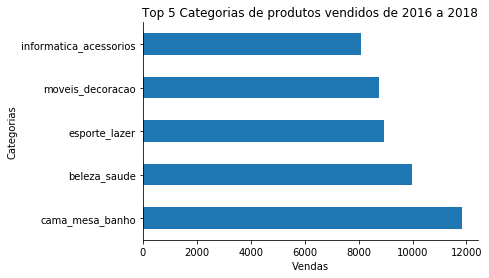

In [25]:
plt.title('Top 5 Categorias de produtos vendidos de 2016 a 2018')
plt.xlabel('Vendas')
plt.ylabel('Categorias')
category_top5.plot.barh();
sns.despine()

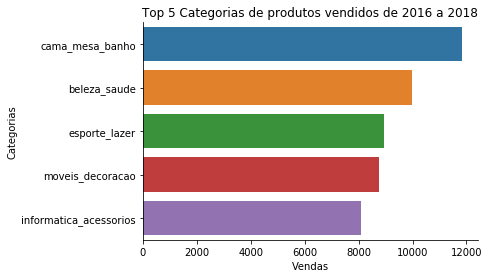

In [84]:
plt.title('Top 5 Categorias de produtos vendidos de 2016 a 2018')
ax = sns.barplot(x=category_top5, y=category_top5.index);
ax.set(xlabel='Vendas', ylabel='Categorias')
sns.despine()

### Quais estados/cidades compram mais?

In [26]:
orders_states = db.customer_state.value_counts()

In [27]:
orders_states

SP    49566
RJ    15327
MG    13638
RS     6486
PR     5962
SC     4302
BA     4048
DF     2473
GO     2430
ES     2338
PE     1889
CE     1551
MT     1125
PA     1116
MA      844
MS      843
PB      639
PI      573
RN      569
AL      458
SE      397
TO      339
RO      286
AM      171
AC       95
AP       84
RR       52
Name: customer_state, dtype: int64

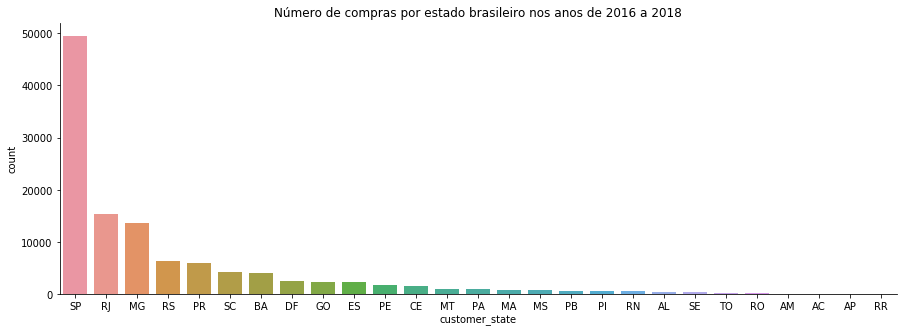

In [28]:
plt.figure(figsize=(15,5))
plt.title('Número de compras por estado brasileiro nos anos de 2016 a 2018')
sns.countplot(x='customer_state',data=db, order=db['customer_state'].value_counts().index);
sns.despine()

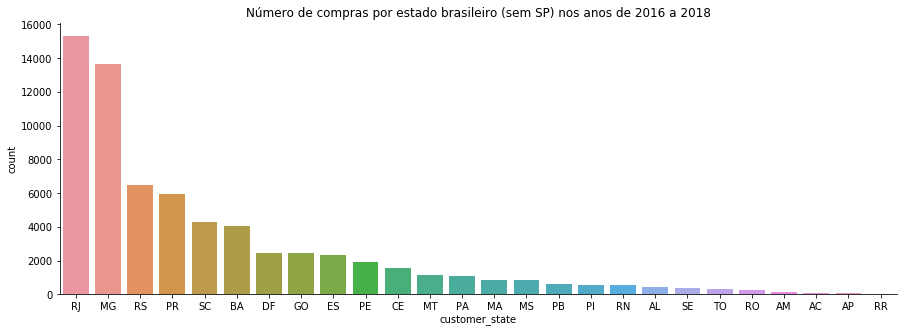

In [29]:
db_semSP = db[db['customer_state'] != 'SP'].copy()
plt.figure(figsize=(15,5))
plt.title('Número de compras por estado brasileiro (sem SP) nos anos de 2016 a 2018')
sns.countplot(x='customer_state',data=db_semSP,order=db_semSP['customer_state'].value_counts().index);
sns.despine()

### Naturalmente, os estados do sudeste são os maiores compradores, pois possuem populações maiores. Com isso, a análise de ticket médio talvez faça mais sentido.

In [30]:
#calculando o ticket medio de cada order

In [31]:
ticket_medio = []
estados = db['customer_state'].unique()
for estado in estados:
    ticket_medio.append(dic_estados[estado]['price'].sum() / dic_estados[estado]['order_id'].count())

In [32]:
estados

array(['RJ', 'GO', 'MG', 'PR', 'BA', 'PE', 'SP', 'DF', 'MA', 'RS', 'SC',
       'ES', 'AM', 'MT', 'SE', 'AL', 'RO', 'CE', 'PB', 'MS', 'PI', 'PA',
       'RN', 'RR', 'AC', 'TO', 'AP'], dtype=object)

In [33]:
print(ticket_medio)

[124.84923076923077, 127.50379423868311, 120.22560712714477, 118.39256457564575, 133.74782608695654, 143.59892006352567, 109.91741818988822, 126.5944439951476, 145.59453791469195, 121.45706598828247, 125.10819386331937, 121.42768605645854, 133.38807017543857, 151.8418133333333, 153.53803526448365, 181.46366812227078, 164.2098951048951, 154.3637911025145, 193.62494522691705, 142.13927639383155, 160.85113438045374, 165.2400358422939, 166.1767135325132, 150.56596153846152, 179.57305263157897, 165.9348377581121, 162.55119047619047]


In [34]:
ticket_medio_estados = []

for i in range(27):
    ticket_medio_estados.append([estados[i],ticket_medio[i]])


In [35]:
db_medias = pd.DataFrame(ticket_medio_estados, columns = ['estado', 'ticket_medio'])

In [36]:
db_medias.loc[27] = ['BR', db_medias.ticket_medio.mean()]

In [37]:
db_medias[['estado','ticket_medio']].sort_values(by='ticket_medio',ascending=False)['estado'].values

array(['PB', 'AL', 'AC', 'RN', 'TO', 'PA', 'RO', 'AP', 'PI', 'CE', 'SE',
       'MT', 'RR', 'BR', 'MA', 'PE', 'MS', 'BA', 'AM', 'GO', 'DF', 'SC',
       'RJ', 'RS', 'ES', 'MG', 'PR', 'SP'], dtype=object)

In [38]:
db_medias[db_medias['estado'].isin(['BR','SP'])]

,estado,ticket_medio
6,SP,109.917418
27,BR,146.069619


In [39]:
db_medias.loc[db_medias['estado'] == 'BR', 'clrs'] = '#68FF1B'
db_medias.loc[db_medias['estado'] != 'BR', 'clrs'] = '#E4E4E4'

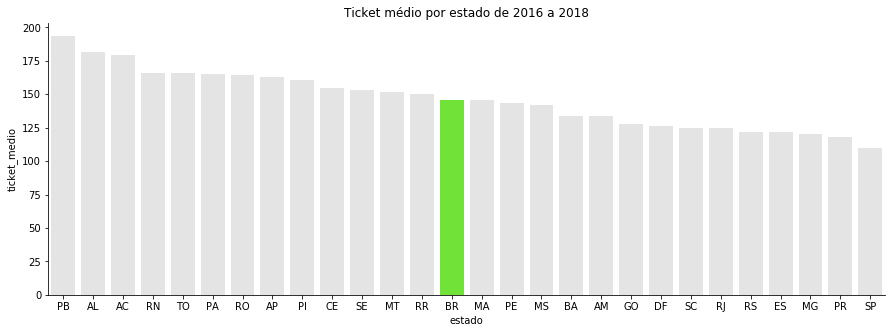

In [40]:
plt.figure(figsize=(15,5))
plt.title('Ticket médio por estado de 2016 a 2018')
sns.barplot(x='estado',
            y='ticket_medio',
            data=db_medias,
            palette=db_medias[['estado','ticket_medio','clrs']].sort_values(by='ticket_medio',ascending=False)['clrs'],
            order=db_medias[['estado','ticket_medio']].sort_values(by='ticket_medio',ascending=False)['estado'].values);
sns.despine()

In [41]:
#db_medias.set_index('estado', inplace=True)

In [42]:
#db_medias.ticket_medio.sort_values(ascending=False).plot.bar(figsize=(15,5), colormap='rainbow', title= 'Ticket médio por estado de 2016 a 2018');

### Talvez, o preço do frente tenha uma relação importante com o ticket médio do estados

In [43]:
fretes_estados = db.pivot_table(index=['customer_state'], values=['freight_value'])

In [44]:
db_medias.set_index('estado', inplace=True)

In [45]:
db_medias['frete_medio'] = fretes_estados

In [46]:
db_medias['frete_medio'].fillna(db_medias[db_medias['frete_medio'].notnull()]['frete_medio'].mean(),inplace=True)

In [47]:
db_medias.reset_index(inplace=True)

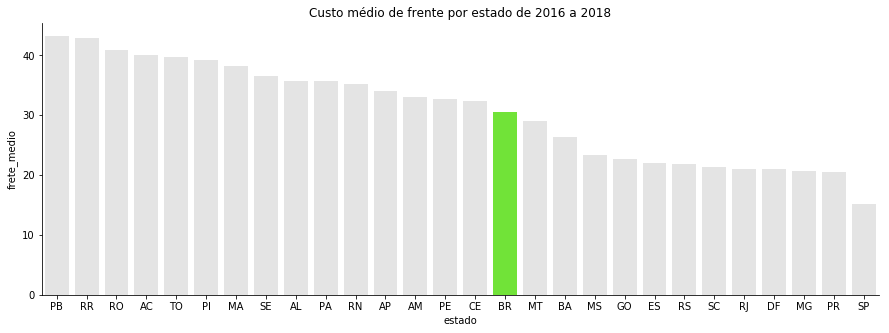

In [48]:
plt.figure(figsize=(15,5))
plt.title('Custo médio de frente por estado de 2016 a 2018')
sns.barplot(x='estado',
            y='frete_medio',
            data=db_medias,
            palette=db_medias[['estado','frete_medio','clrs']].sort_values(by='frete_medio',ascending=False)['clrs'],
            order=db_medias[['estado','frete_medio']].sort_values(by='frete_medio',ascending=False)['estado'].values);
sns.despine()

In [49]:
#db_medias.frete_medio.sort_values(ascending=False).plot.bar(figsize=(15,5), colormap='rainbow', title= 'Custo médio de frente por estado de 2016 a 2018');

### Os estados do Norte e Nordeste apresentam um frete médio maior que os estados do Sul e Sudeste

### Calculando a correlação entre o ticket médio do estado e seu frete médio

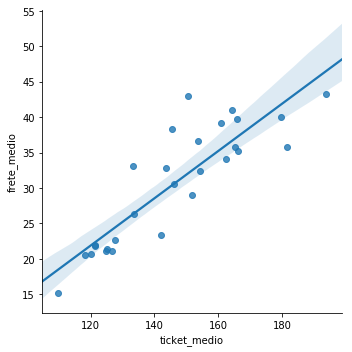

In [50]:
sns.lmplot(x='ticket_medio', y='frete_medio', data=db_medias);

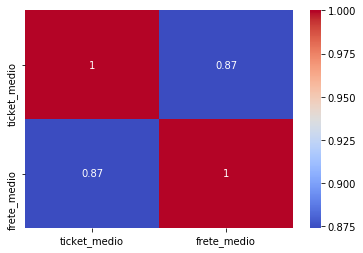

In [51]:
sns.heatmap(db_medias.corr(),cmap='coolwarm',annot=True);

### Quais as formas de pagamento mais utilizadas? Isto varia entre estados?

In [52]:
pagamentos = db.payment_type.value_counts()

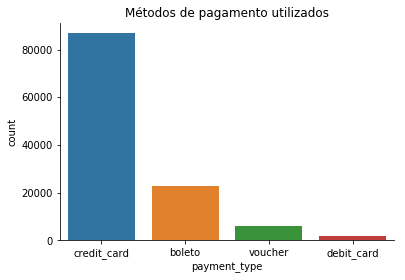

In [53]:
plt.title('Métodos de pagamento utilizados')
sns.countplot(x='payment_type',data=db);
sns.despine()

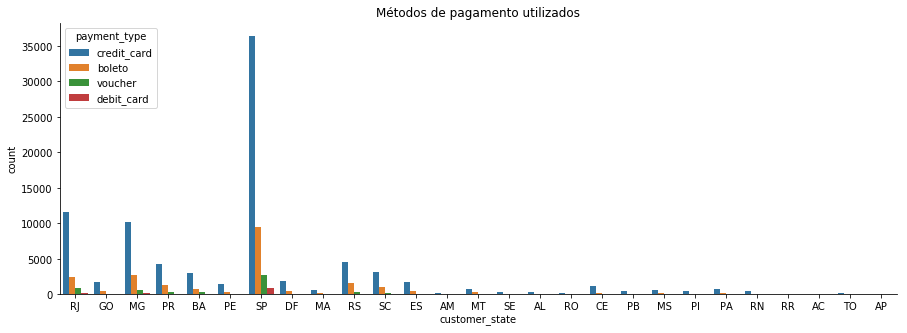

In [54]:
#SEGREGAR POR ESTADOS
plt.figure(figsize=(15,5))
plt.title('Métodos de pagamento utilizados')
sns.countplot(x='customer_state', hue='payment_type',data=db);
sns.despine()

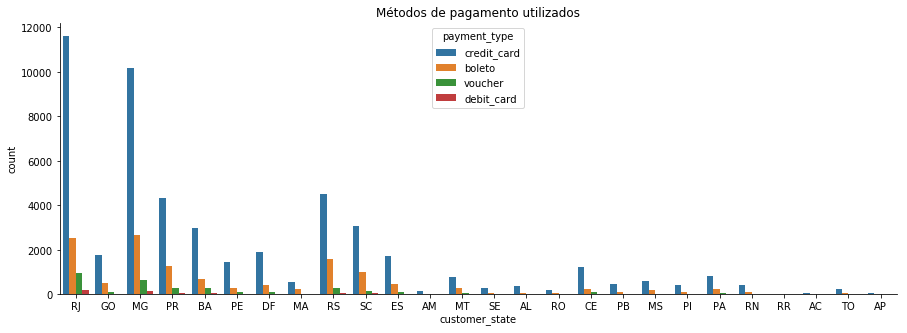

In [55]:
#SEM SP
plt.figure(figsize=(15,5))
plt.title('Métodos de pagamento utilizados')
sns.countplot(x='customer_state', hue='payment_type',data=db_semSP);
sns.despine()

### Cartão de crédito é, com folga, o maior meio de pagamento. Vamos verificar, em média, quantas vezes os pagamentos são parcelados

In [56]:
#media de parcelamento por estado

parcela_media = []
for estado in estados:
    parcela_media.append(dic_estados[estado]['payment_installments'].sum() / dic_estados[estado]['order_id'].count())


In [57]:
parcela_media.append(sum(parcela_media)/len(parcela_media))

In [58]:
db_medias['parcelas_medias'] = parcela_media

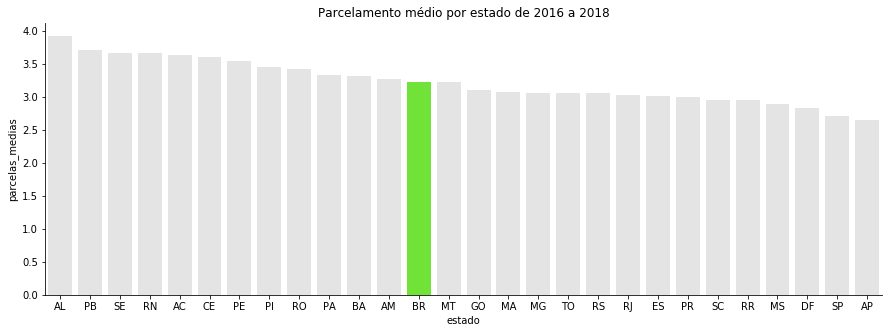

In [59]:
plt.figure(figsize=(15,5))
plt.title('Parcelamento médio por estado de 2016 a 2018')
sns.barplot(x='estado',
            y='parcelas_medias',
            data=db_medias,
            palette=db_medias[['estado','parcelas_medias','clrs']].sort_values(by='parcelas_medias',ascending=False)['clrs'],
            order=db_medias[['estado','parcelas_medias']].sort_values(by='parcelas_medias',ascending=False)['estado'].values);
sns.despine()

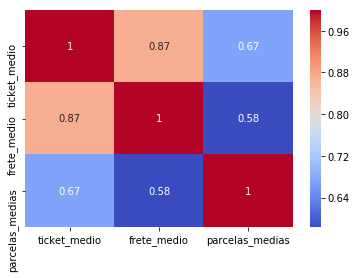

In [66]:
sns.heatmap(db_medias.corr(), cmap='coolwarm',annot=True);

In [60]:
#db_medias.parcelas_medias.sort_values(ascending=False).plot.bar(figsize=(15,5), colormap='rainbow', title= 'Parcelamento médio por estado de 2016 a 2018');

### Analisando geolocalização dos pedidos

In [61]:
# Gets the first three and four first digits of zip codes, we will explore this further to understand how zip codes works
geo['geolocation_zip_code_prefix_1_digits'] = geo['geolocation_zip_code_prefix'].str[0:1]
geo['geolocation_zip_code_prefix_2_digits'] = geo['geolocation_zip_code_prefix'].str[0:2]
geo['geolocation_zip_code_prefix_3_digits'] = geo['geolocation_zip_code_prefix'].str[0:3]
geo['geolocation_zip_code_prefix_4_digits'] = geo['geolocation_zip_code_prefix'].str[0:4]

In [62]:
brazil = geo
agg_name = 'geolocation_zip_code_prefix'
brazil[agg_name].describe().to_frame()

,geolocation_zip_code_prefix
count,1000163
unique,19015
top,24220
freq,1146


In [63]:
# plot wtih holoviews + datashader - bokeh with map background
import holoviews as hv
import geoviews as gv
import datashader as ds
from colorcet import fire, rainbow, bgy, bjy, bkr, kb, kr
from datashader.colors import colormap_select, Greys9
from holoviews.streams import RangeXY
from holoviews.operation.datashader import datashade, dynspread, rasterize
from bokeh.io import push_notebook, show, output_notebook
output_notebook()
hv.extension('bokeh')

%opts Overlay [width=800 height=600 toolbar='above' xaxis=None yaxis=None]
%opts QuadMesh [tools=['hover'] colorbar=True] (alpha=0 hover_alpha=0.2)

T = 0.05
PX = 1

def plot_map(data, label, agg_data, agg_name, cmap):
    url="http://server.arcgisonline.com/ArcGIS/rest/services/Canvas/World_Dark_Gray_Base/MapServer/tile/{Z}/{Y}/{X}.png"
    geomap = gv.WMTS(url)
    points = hv.Points(gv.Dataset(data, kdims=['x', 'y'], vdims=[agg_name]))
    agg = datashade(points, element_type=gv.Image, aggregator=agg_data, cmap=cmap)
    zip_codes = dynspread(agg, threshold=T, max_px=PX)
    hover = hv.util.Dynamic(rasterize(points, aggregator=agg_data, width=50, height=25, streams=[RangeXY]), operation=hv.QuadMesh)
    hover = hover.options(cmap=cmap)
    img = geomap * zip_codes * hover
    img = img.relabel(label)
    return img

ModuleNotFoundError: No module named 'geoviews'